<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/2_Linear_Regression(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Moore's law?

+ **It says that the numbers or transistors per square inch on integrated circuits doubles approx every 2 years.**

+ **Now we might think its not linear, and yes, thats correct as well.**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set_style('darkgrid')

In [9]:
url = 'https://raw.githubusercontent.com/ingledarshan/Skillslash_dl/main/moore.csv'
data = pd.read_csv(url, header=None).values

In [10]:
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [11]:
X = data[:,0]
X.shape

(162,)

In [13]:
X = X.reshape(-1,1) #make it a 2D array of size nxD where D=1
X.shape
#Converted it to 2D because tensorflow accepts 2D data

(162, 1)

In [14]:
Y = data[:,1]
Y.shape

(162,)

In [15]:
print(type(data))

<class 'numpy.ndarray'>


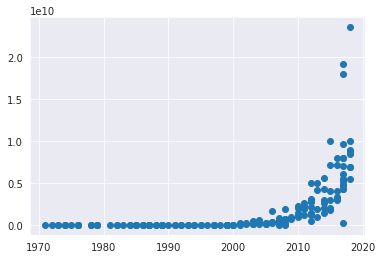

In [18]:
#Plot the data
plt.scatter(X,Y)
plt.show()

+ It is exponential

We have to apply polynomial regression instead of linear regression, for linear regression we should apply log transformation.

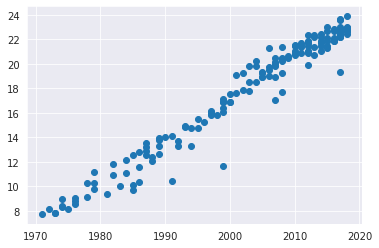

In [20]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

+ This is now a good candidate for linear regression after applying log on Y.

+ Since X-Axis is having large axes and also it is not centered across 0.
+ So, we need to scale it for better predictions.


In [22]:
#Manually scaling
X = X-X.mean()

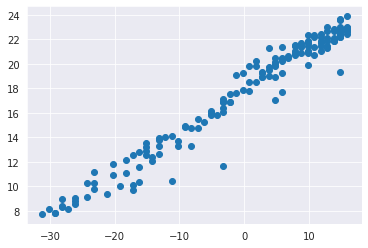

In [23]:
plt.scatter(X,Y)
plt.show()

+ Now X-axis is scaled and also centered along 0.
+ Now on neural network we could apply linear activation fucntion or we can also say there is no need to apply any activation function.

---

+ Since we are doing a regression problem, we do not use any Activation function.
+ Therefore, in Keras, we do use a Denser layer but we pass Activation=None or we can simply omit the argument.

> **Note:** Activation=None is the default value.

In [25]:
#Lets create a tenssorflow model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)    
])

> 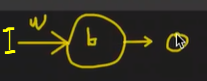

In [26]:
#Compile the model
#Adam sometimes didn't works best
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')

+ **Another observation:** Initial Learning rate performs well at the beginning, but becomes too large at the end. Because of this, the cost jumped up and down, but never converged.

+ So, one thing to do is to mitigate this to decrease the learning rate depending on the epoch number. This is called as ***Learning Rate Scheduling.***

In [27]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

> 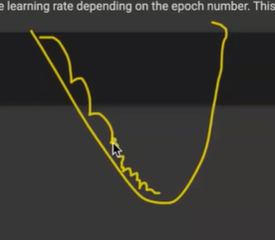

In [28]:
#Train the model
r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 384.6767 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 314.3537 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 302.4338 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 262.9595 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 253.7063 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 209.4673 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 188.3602 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 143.6661 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 97.3843 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 39.9091 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss:

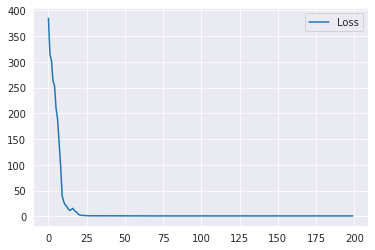

In [29]:
#Plot the loss
plt.plot(r.history['loss'], label='Loss')
plt.legend()
plt.show()

+ It looks from the above graph that it has converged. 

In [32]:
# Get the slope of the line
# Remeber, the slope of the line is related to the doubling rate of the transistor count
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33718088]], dtype=float32), array([17.770353], dtype=float32)]


In [40]:
a = model.layers[0].get_weights()[0][0][0]
a

0.33718088

In [38]:
print("Time to double: ", np.log(2)/a)

Time to double:  2.0557131680339427


+ Therefore, we have confirmed that the Moore's Law is true as we see it has doubled.

**Making Predictions**

In [41]:
Yhat = model.predict(X)
Yhat.shape

(162, 1)

In [42]:
Yhat = Yhat.flatten()
Yhat.shape

(162,)

In [43]:
Yhat

array([ 7.2511425,  7.5883236,  7.9255037,  7.9255037,  8.262685 ,
        8.262685 ,  8.262685 ,  8.599866 ,  8.937047 ,  8.937047 ,
        8.937047 ,  9.611408 ,  9.611408 ,  9.948589 ,  9.948589 ,
        9.948589 , 10.6229515, 10.960133 , 10.960133 , 11.297313 ,
       11.634494 , 11.634494 , 11.971675 , 11.971675 , 11.971675 ,
       12.308855 , 12.308855 , 12.308855 , 12.646036 , 12.646036 ,
       12.646036 , 12.646036 , 12.983217 , 12.983217 , 13.320398 ,
       13.320398 , 13.320398 , 13.320398 , 13.657579 , 13.9947605,
       13.9947605, 14.331941 , 14.331941 , 14.669122 , 14.669122 ,
       15.006303 , 15.006303 , 15.343483 , 16.692207 , 15.343483 ,
       15.680664 , 16.017845 , 16.017845 , 16.017845 , 16.355026 ,
       16.692207 , 16.692207 , 17.029388 , 17.029388 , 16.692207 ,
       16.692207 , 16.692207 , 17.029388 , 17.36657  , 17.36657  ,
       17.70375  , 18.37811  , 18.37811  , 18.715292 , 19.052473 ,
       18.715292 , 19.052473 , 19.389654 , 19.726835 , 18.0409

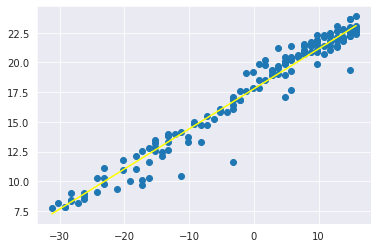

In [46]:
plt.scatter(X,Y)
plt.plot(X,Yhat, color='yellow') #line of regression
plt.show()

+ **Observation:** As expected, the line passes through the data points. Therefore, here, we have again confirmed that the Moore's law is True.

In [48]:
#Manual Calculation
#Get the weights
w, b = model.layers[0].get_weights()
#m,c
# print(w,b)

#Reshape X because we flattened it earlier
X = X.reshape(-1,1)
Yhat2 = (X.dot(w) + b).flatten()

In [49]:
Yhat2

array([ 7.25114232,  7.58832321,  7.92550409,  7.92550409,  8.26268497,
        8.26268497,  8.26268497,  8.59986585,  8.93704674,  8.93704674,
        8.93704674,  9.6114085 ,  9.6114085 ,  9.94858938,  9.94858938,
        9.94858938, 10.62295115, 10.96013203, 10.96013203, 11.29731291,
       11.6344938 , 11.6344938 , 11.97167468, 11.97167468, 11.97167468,
       12.30885556, 12.30885556, 12.30885556, 12.64603645, 12.64603645,
       12.64603645, 12.64603645, 12.98321733, 12.98321733, 13.32039821,
       13.32039821, 13.32039821, 13.32039821, 13.65757909, 13.99475998,
       13.99475998, 14.33194086, 14.33194086, 14.66912174, 14.66912174,
       15.00630262, 15.00630262, 15.34348351, 16.69220704, 15.34348351,
       15.68066439, 16.01784527, 16.01784527, 16.01784527, 16.35502616,
       16.69220704, 16.69220704, 17.02938792, 17.02938792, 16.69220704,
       16.69220704, 16.69220704, 17.02938792, 17.3665688 , 17.3665688 ,
       17.70374969, 18.37811145, 18.37811145, 18.71529233, 19.05

In [52]:
np.allclose(Yhat, Yhat2) #whether Yhat==Yhat2
#allclose compare each and every value in Yhat and Yhat2, return True if all equal else false

True

---
**END**
---